# Load model from MLFlow and evaluate by execution

In [8]:
import mlflow
from mlflow.tracking import MlflowClient

mlflow.set_tracking_uri("http://127.0.0.1:5000")
client = MlflowClient()

run_id = "4c68862d1de14fea91c04d4a29324d11"

artifacts = client.list_artifacts(run_id)
print("Artifacts in run root:")
for a in artifacts:
    print(" -", a.path, "(dir)" if a.is_dir else "(file)")


Artifacts in run root:
 - windchill_loss.png (file)
 - windchill_prediction_surface.png (file)
 - windchill_prediction_training.png (file)
 - windchill_surface.png (file)
 - windchill_training_data.png (file)


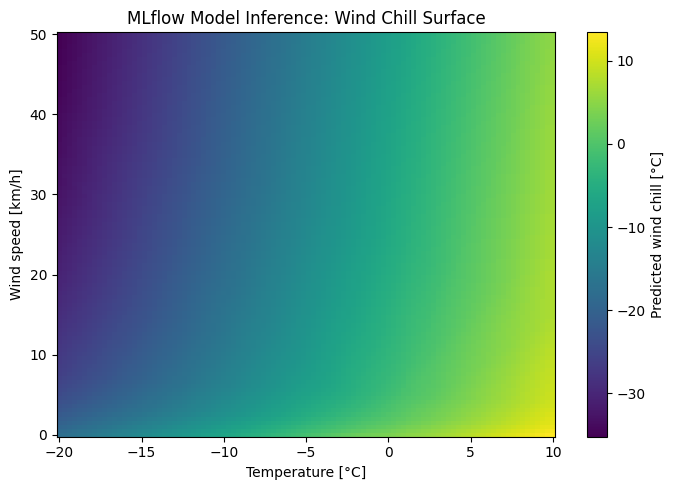

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import mlflow.pytorch

# ------------------------------------------------------------
# Create dense input grid over full domain
# ------------------------------------------------------------
tt_grid = np.linspace(-20, 10, 100)   # temperature [°C]
ff_grid = np.linspace(0, 50, 100)     # wind speed [km/h]
TT, FF = np.meshgrid(tt_grid, ff_grid)

x_grid = torch.tensor(
    np.column_stack((TT.ravel(), FF.ravel())),
    dtype=torch.float32
)

# ------------------------------------------------------------
# Model inference
# ------------------------------------------------------------
with torch.no_grad():
    wc_pred = model(x_grid).cpu().numpy()

wc_pred_grid = wc_pred.reshape(TT.shape)

# ------------------------------------------------------------
# Plot predicted surface
# ------------------------------------------------------------
plt.figure(figsize=(7, 5))

pcm = plt.pcolormesh(
    TT, FF, wc_pred_grid,
    shading="auto",
    cmap="viridis"
)

plt.colorbar(pcm, label="Predicted wind chill [°C]")
plt.xlabel("Temperature [°C]")
plt.ylabel("Wind speed [km/h]")
plt.title("MLflow Model Inference: Wind Chill Surface")

plt.tight_layout()
plt.savefig("windchill_prediction_surface2.png", dpi=150)
plt.show()
